In [1]:
import sympy as sp
import numpy as np
from sympy.plotting import plot
from matplotlib import style
import matplotlib.pyplot as plt
style.use('seaborn-v0_8-whitegrid')
sp.init_printing(use_unicode = False, wrap_line = False, no_global = True)
%matplotlib inline

### Задание 1.6. Марковские модели (часть 1) ###

#### *1. Докажите, что экспоненциальное распределение обладает марковским свойством.* ####

Доказательство:
Рассмотрим марковское свойство: $$P\left\{ \xi> t+x| \xi>t\right\} = P\left\{\xi>x\right\}$$
Распишем условную вероятность: $$P\left\{ \xi> t+x| \xi>t\right\} = \frac{P\left\{ \xi> t+x, \xi>t\right\}}{P\left\{\xi>t\right\}}~~~~~~~~~(1)$$
Так как $$\lbrace\xi>t+x\rbrace\subseteq\lbrace\xi>t\rbrace\Rightarrow\lbrace\xi>t+x,\xi>t\rbrace=\lbrace\xi>t+x\rbrace$$
Тогда (1) примет вид: $$P\left\{ \xi> t+x| \xi>t\right\} = \frac{P\left\{ \xi> t+x, \xi>t\right\}}{P\left\{\xi>t\right\}} = \frac{P\left\{ \xi> t+x\right\}}{P\left\{\xi>t\right\}} = \frac{R(t+x)}{R(t)} = \frac{e^{-\lambda(t+x)}}{e^{-\lambda t}} = e^{-\lambda x} = R(x) = P\left\{\xi>x\right\}$$

#### *2. (\*) Докажите, что если с.в. обладает марковским свойством, то она имеет экспоненциальное распределение.* ####

*Указание*. Для $R(t)=P\lbrace\xi>t\rbrace$ соотношение $P\lbrace\xi>t+x|\xi>t\rbrace=P\lbrace\xi>x\rbrace$ станет уравнением $R(t+x)=R(t)R(x)$. Проинтегрировать правую и левую части равенство по $x$ от $0$ до $\infty$, а затем продифференцировать их по $t$. Решением полученного дифференциального уравнения будет $R(t)=e^{-\lambda t}$

**Доказательство.** Известно, что $P\lbrace\xi>t+x|\xi>t\rbrace=P\lbrace\xi>x\rbrace$ выполняется для заданной $\xi$
$$P\lbrace\xi>t+x|\xi>t\rbrace=P\lbrace\xi>x\rbrace\Rightarrow\frac{P\lbrace\xi>t+x\rbrace}{P\lbrace\xi>t\rbrace}=P\lbrace\xi>x\rbrace\Rightarrow\frac{R(t+x)}{R(t)}=R(x)\Rightarrow R(t+x)=R(t)R(x)$$
$$\int^{\infty}_{0}{R(t+x)dx}=\int^{\infty}_{0}{R(t)R(x)dx}$$
$$u=t+x;du=dx$$
$$
\begin{cases}
x=0\to u=t\\
x=\infty\to u=\infty
\end{cases}
$$
$$\int^{\infty}_{t}{R(u)du}=R(t)\int^{\infty}_{0}{R(x)dx}$$
$$\frac{d}{dt}\int^{\infty}_{t}{R(u)du}=\frac{d}{dt}\left(R(t)\int^{\infty}_{0}{R(x)dx}\right)$$
Пусть $I_R=\int^{\infty}_{0}{R(x)dx}$
$$\frac{d}{dt}\int^{\infty}_{t}{R(u)du}=I_R\frac{dR(t)}{dt}$$
Производную интеграла вычисляем как $\frac{d}{dt}\int^\infty_t{R(u)du}=-\frac{d}{dt}\int^t_\infty{R(u)du}=-R(t)\cdot 1=-R(t)$
$$-R(t)=I_R\frac{dR(t)}{dt}$$
$$\frac{dR(t)}{R(t)}=-\frac{1}{I_R}dt$$
$$ln{R(t)}=-\frac{1}{I_R}t+C$$
$$R(t)=Ce^{-\frac{1}{I_R}t}$$
$$R(0)=C=1\Rightarrow R(t)=e^{-\frac{1}{I_R}t}$$
$$R(t)=e^{-\frac{1}{I_R}t}=e^{-\lambda t}, ~где ~\lambda=\frac{1}{I_R}=\int^{\infty}_{0}{R(x)dx}$$

#### *3. Система состоит из двух последовательно соединенных блоков. Первый блок – нагруженный резерв, второй – ненагруженный. Все элементы одинаковы. Время работы имеет экспоненциальное распределение с параметром $\lambda = 0.5 г^{−1}$. Постройте граф переходов и выпишите систему уравнений Колмогорова для вычисления вероятности безотказной работы системы.* ####

Рассмотрим блоки, состоящие из 2-х элементов каждый (основной и резервный).\
Обозначим состояние системы в момент времени $t$ как случайный процесс $X(t)$.\
Пронумеруем состояния системы:

0. Все элементы работоспособны;
1. Отказал один из элементов из 1-го блока;
2. Отказал основной элемент из 2-го блока;
3. Отказали один элемент из 1-го блока и основной элемент из 2-го блока;
4. Отказала система (второй элемент из 1-го блока или резервный из 2-го).


Т.к. все элементы одинаковы и их время работы распределено экспоненциально, то ф.р. их времени работы до отказа $F(t)=1-e^{-\lambda t}$


$$p_{ij}(h)=P\lbrace X(t+h)=j|X(t)=i\rbrace=P\lbrace T\leq t+h|T>t\rbrace=1-P\lbrace T>t+h|T>t\rbrace=1-e^{-\lambda_{ij}h}$$
$$p_{ij}(h)=1-e^{-\lambda_{ij}h}=1-(1-\lambda_{ij}h)+o(h)=\lambda_{ij}h+o(h)$$
$$\lambda_{ij}=\frac{dp_{ij}}{dh}(0)$$

$$
\begin{CD}
\cdot @>>> \textcircled{1} @>\lambda>> \cdot \\
@A2\lambda AA @V\lambda VV @VVV\\
\textcircled{0} @. \textcircled{3} @>2\lambda>> \textcircled{4}\\
@V\lambda VV @A2\lambda AA @AAA\\
\cdot @>>> \textcircled{2} @>\lambda>> \cdot
\end{CD}
$$


$$\sum_{j=0}^4{p_{ij}(h)}=1\Rightarrow p_{ii}(h) = 1 - \sum_{j \neq i} p_{ij}(h)$$
$$\sum_{j=0}^4{\lambda_{ij}}=0\Rightarrow\lambda_{ii} = -\sum_{j \neq i} \lambda_{ij}$$


$$
\Lambda=[\lambda_{ij}]_{ij}=
\left[
\begin{matrix}
-3\lambda & 2\lambda & \lambda & 0 & 0 \\
0 & -2\lambda & 0 & \lambda & \lambda \\
0 & 0 & -3\lambda & 2\lambda & \lambda \\
0 & 0 & 0 & -2\lambda & 2\lambda \\
0 & 0 & 0 & 0 & 0
\end{matrix}
\right]=
\left[
\begin{matrix}
-1.5 & 1 & 0.5 & 0 & 0\\
0 & -1 & 0 & 0.5 & 0.5\\
0 & 0 & -1.5 & 1 & 0.5\\
0 & 0 & 0 & -1 & 1\\
0 & 0 & 0 & 0 & 0
\end{matrix}
\right]
$$
$$
\Lambda'=
\left[
\begin{matrix}
-1.5 & 0 & 0 & 0 & 0\\
1 & -1 & 0 & 0 & 0\\
0.5 & 0 & -1.5 & 0 & 0\\
0 & 0.5 & 1 & -1 & 0\\
0 & 0.5 & 0.5 & 1 & 0
\end{matrix}
\right]
$$


*Система уравнений Колмогорова:*
$$
\begin{cases}
\frac{d\overrightarrow{p}}{dt}(t)=\Lambda'\overrightarrow{p}(t)\\
\sum^4_{i=0}{p_i(t)}=1\\
p_0(0)=1,\\
p_i(0)=0, i\neq 0
\end{cases}
$$

$$
\begin{cases}
\frac{dp_0}{dt}(t)=-1.5p_0(t)\\
\frac{dp_1}{dt}(t)=p_0(t) - p_1(t)\\
\frac{dp_2}{dt}(t)=0.5p_0(t) - 1.5p_2(t)\\
\frac{dp_3}{dt}(t)=0.5p_1(t) + p_2(t) - p_3(t)\\
\frac{dp_4}{dt}(t)=0.5p_1(t) + 0.5p_2(t) + p_3(t)\\
\sum^4_{i=0}{p_i(t)}=1\\
p_0(0)=1,\\
p_i(0)=0, i\neq 0
\end{cases}
$$

#### *5. Решите систему Колмогорова из предыдущей задачи с помощью преобразования Лапласа. Найдите вероятность безотказной работы системы. Постройте графики ее зависимости от времени.* ####

$$
\begin{cases}
\frac{dp_0}{dt}(t)=-1.5p_0(t)\\
\frac{dp_1}{dt}(t)=p_0(t) - p_1(t)\\
\frac{dp_2}{dt}(t)=p_0(t) - 1.5p_2(t)\\
\frac{dp_3}{dt}(t)=0.5p_1(t) + p_2(t) - p_3(t)\\
\frac{dp_4}{dt}(t)=0.5p_1(t) + 0.5p_2(t) + p_3(t)\\
\sum^4_{i=0}{p_i(t)}=1\\
p_0(0)=1,\\
p_i(0)=0, i\neq 0
\end{cases}
$$


Т.к. $det{\Lambda}=det{\Lambda'}=0$, то выбросим 5-е уравнение (с производной $p_4$):
$$
\begin{cases}
\frac{dp_0}{dt}(t)=-1.5p_0(t)\\
\frac{dp_1}{dt}(t)=p_0(t) - p_1(t)\\
\frac{dp_2}{dt}(t)=p_0(t) - 1.5p_2(t)\\
\frac{dp_3}{dt}(t)=0.5p_1(t) + p_2(t) - p_3(t)\\
\sum^4_{i=0}{p_i(t)}=1\\
p_0(0)=1,\\
p_i(0)=0, i\neq 0
\end{cases}
$$


Для решений системы воспользуемся преобразованиями Лапласа
$$p_i(t)\risingdotseq\widetilde{p}_i(s)$$
$$\frac{dp_i}{dt}(t)\risingdotseq s\widetilde{p}_i(s)-p_i(0)$$


Получим:
$$
\begin{cases}
s\widetilde{p}_0(s)-1=-1.5\widetilde{p}_0(s)\\
s\widetilde{p}_1(s)=\widetilde{p}_0(s)-\widetilde{p}_1(s)\\
s\widetilde{p}_2(s)=\widetilde{p}_0(s)-1.5\widetilde{p}_2(s)\\
s\widetilde{p}_3(s)=0.5\widetilde{p}_1(s)+\widetilde{p}_2(s)-\widetilde{p}_3(s)\\
\sum_{i=0}^4{\widetilde{p}_i(s)}=\frac{1}{s}
\end{cases}
$$


Найдём $\widetilde{p}_0(s)$:
$$(s+1.5)\widetilde{p}_0(s)=1$$
$$\widetilde{p}_0(s)=\frac{1}{s+1.5}$$
Получили табличное изображение, можем найти $p_0(t)$:
$$p_0(t)=e^{-1.5t}$$


Найдём $\widetilde{p}_1(s)$:
$$(s+1)\widetilde{p}_1(s)=\widetilde{p}_0(s)$$
$$(s+1)\widetilde{p}_1(s)=\frac{1}{(s+1.5)}$$
$$\widetilde{p}_1(s)=\frac{1}{(s+1)(s+1.5)}$$
По методу неопределённых коэффициентов:
$$\frac{1}{(s+1)(s+1.5)}=\frac{A}{s+1}+\frac{B}{s+1.5}=\frac{(A+B)s+(1.5A+B)}{(s+1)(s+1.5)}$$
$$
\begin{cases}
A+B=0\\
1.5A+B=1
\end{cases}
$$
$$A=-B$$
$$-0.5B=1\Rightarrow B=-2$$
$$A=2$$
$$\widetilde{p}_1(s)=\frac{2}{s+1}-\frac{2}{s+1.5}$$
Найдём $p_1(t)$:
$$p_1(t)=2e^{-t}-2e^{-1.5t}$$


Найдём $\widetilde{p}_2(s)$:
$$(s+1.5)\widetilde{p}_2(s)=\widetilde{p}_0(s)$$
Аналогично получаем:
$$\widetilde{p}_2(s)=\frac{1}{(s+1.5)^2}$$
$$p_2(t)=te^{-1.5t}$$


Найдём $\widetilde{p}_3(s)$:
$$(s+1)\widetilde{p}_3(s)=0.5\widetilde{p}_1(s)+\widetilde{p}_2(s)$$
$$(s+1)\widetilde{p}_3(s)=\frac{1}{s+1}-\frac{1}{s+1.5}+\frac{1}{(s+1.5)^2}$$
$$\widetilde{p}_3(s)=\frac{1}{(s+1)(s+1.5)^2}=\left[\frac{A}{s+1}+\frac{B}{s+1.5}+\frac{C}{(s+1.5)^2}\right]$$

In [2]:
sp.expand('A*(s+1.5)^2+B*(s+1)*(s+1.5)+C*(s+1)').simplify()

$$
\begin{cases}
A+B=0\\
3A+2.5B+C=0\\
2.25A+1.5B+C=1
\end{cases}
$$

In [3]:
np.linalg.solve(
    np.array([
        [1, 1, 0],
        [3, 2.5, 1],
        [2.25, 1.5, 1]
    ]),
    np.array([0, 0, 1])
)

array([ 4., -4., -2.])

$$\widetilde{p}_3(s)=\frac{4}{s+1}-\frac{4}{s+1.5}-\frac{2}{(s+1.5)^2}$$
$$p_3(t)=4e^{-t}-4e^{-1.5t}-2te^{-1.5}$$


Выразим $\widetilde{p}_4(s)$:
$$\widetilde{p}_4(s)=\frac{1}{s}-\widetilde{p}_0(s)-\widetilde{p}_1(s)-\widetilde{p}_2(s)-\widetilde{p}_3(s)=$$
$$=\frac{1}{s}-\frac{1}{s+1.5}-\frac{2}{s+1}+\frac{2}{s+1.5}-\frac{4}{s+1}+\frac{4}{s+1.5}+\frac{2}{(s+1.5)^2}=$$
$$=\frac{1}{s}-\frac{6}{s+1}+\frac{5}{s+1.5}+\frac{2}{(s+1.5)^2}$$
Найдём $p_4(t)$:
$$p_4(t)=1-6e^{-t}+5e^{-1.5t}+2te^{-1.5t}$$


$$
\begin{cases}
p_0(t)=e^{-1.5t}\\
p_1(t)=2e^{-t}-2e^{-1.5t}\\
p_2(t)=te^{-1.5t}\\
p_3(t)=4e^{-t}-4e^{-1.5t}-2te^{-1.5t}\\
p_4(t)=1-6e^{-t}+5e^{-1.5t}+2te^{-1.5t}
\end{cases}
$$


$$F(t)=p_4(t)=1-6e^{-t}+5e^{-1.5t}+2te^{-1.5t}$$
$$R(t)=1-F(t)=6e^{-t}-5e^{-1.5t}-2te^{-1.5t}$$

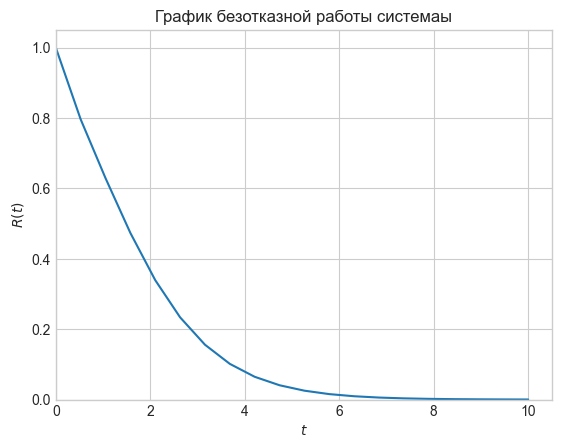

In [4]:
R = lambda t : 6*np.exp(-t)-5*np.exp(-1.5*t)-2*t*np.exp(-1.5*t)
x = np.linspace(0, 10, 20)
y = R(x)
plt.plot(x, y)
plt.ylabel("$R(t)$")
plt.xlabel("$t$")
plt.title("График безотказной работы системaы")
plt.xlim(0)
plt.ylim(0)
plt.show()